## Pairwise sequence alignment

### Getting started

Create a "R \[conda env:r_3.6\]" notebook in the "my_notebooks/week03" folder. Name this notebook "seqAln_pValues".

At any time if you want to stop, remember to "Save and Checkpoint" your notebook before doing "Close and Halt".

### Pairwise global alignment of DNA sequences using the Needleman-Wunsch algorithm

The `nucleotideSubstitutionMatrix` function from `Biostrings` package creates an object that represents a nucleotide substitution matrix.  What does the `#` in the code do?

In [37]:
library(Biostrings)
sigma <- nucleotideSubstitutionMatrix(match = 2, mismatch = -1, baseOnly = TRUE)
sigma # Print out the matrix

,A,C,G,T
A,2,-1,-1,-1
C,-1,2,-1,-1
G,-1,-1,2,-1
T,-1,-1,-1,2


The `pairwiseAlignment` function performs (Needleman-Wunsch) global alignment, (Smith-Waterman) local alignment, and (ends-free) overlap alignment problems.  What does the `scoreOnly` argument do?

In [38]:
s1 <- "GAATTC"
s2 <- "GATTA"
globalAligns1s2 <- pairwiseAlignment(s1, s2, substitutionMatrix = sigma, gapOpening = -2, gapExtension = -8, scoreOnly = FALSE)
globalAligns1s2 # Print out the optimal alignment and its score


Global PairwiseAlignmentsSingleSubject (1 of 1)
pattern: GAATTC
subject: GA-TTA
score: -3 

The `Biostrings` package comes with several precomputed scoring matrices.  We can find out which ones are available to use.

In [1]:
data(package="Biostrings")

In [39]:
data(BLOSUM50)

In [40]:
BLOSUM50# Print out the matrix

,A,R,N,D,C,Q,E,G,H,I,⋯,P,S,T,W,Y,V,B,Z,X,*
A,5,-2,-1,-2,-1,-1,-1,0,-2,-1,⋯,-1,1,0,-3,-2,0,-2,-1,-1,-5
R,-2,7,-1,-2,-4,1,0,-3,0,-4,⋯,-3,-1,-1,-3,-1,-3,-1,0,-1,-5
N,-1,-1,7,2,-2,0,0,0,1,-3,⋯,-2,1,0,-4,-2,-3,4,0,-1,-5
D,-2,-2,2,8,-4,0,2,-1,-1,-4,⋯,-1,0,-1,-5,-3,-4,5,1,-1,-5
C,-1,-4,-2,-4,13,-3,-3,-3,-3,-2,⋯,-4,-1,-1,-5,-3,-1,-3,-3,-2,-5
Q,-1,1,0,0,-3,7,2,-2,1,-3,⋯,-1,0,-1,-1,-1,-3,0,4,-1,-5
E,-1,0,0,2,-3,2,6,-3,0,-4,⋯,-1,-1,-1,-3,-2,-3,1,5,-1,-5
G,0,-3,0,-1,-3,-2,-3,8,-2,-4,⋯,-2,0,-2,-3,-3,-4,-1,-2,-2,-5
H,-2,0,1,-1,-3,1,0,-2,10,-4,⋯,-2,-1,-2,-3,2,-4,0,0,-1,-5
I,-1,-4,-3,-4,-2,-3,-4,-4,-4,5,⋯,-3,-3,-1,-3,-1,4,-4,-3,-1,-5


In [42]:
s3 <- "PAWHEAE"
s4 <- "HEAGAWGHEE"
globalAligns3s4 <- pairwiseAlignment(s3, s4, substitutionMatrix =BLOSUM50, gapOpening = -2, 
                                     gapExtension = -8, scoreOnly = FALSE)
globalAligns3s4 # Print out the optimal global alignment and its score

Global PairwiseAlignmentsSingleSubject (1 of 1)
pattern: P---AWHEAE
subject: HEAGAWGHEE
score: -5 

### Calculating the statistical significance of a pairwise global alignment¶

How do we know if this alignment of score -5 is *statistically significant*?

We can measure this by caculating a *p-value* for this score.

Recall that p-value is probability of obtaining test results at least as extreme as the results actually observed during the test, assuming that the null hypothesis is correct.

In our case, we want the probability of obtaining alignment scores ("test result") at least as good as the alignment score actually observed (-5), for two random sequences of the same length and composition.

This means we first need to generate random sequences with the same length and amino acid composition as the query sequence.  The `generateSeqsWithMultinomialModel` function in the shared folder can achieve this.  Copy it below.

In [50]:
generateSeqsWithMultinomialModel <- function(inputsequence, X) {
     # Change the input sequence into a vector of letters
     require("seqinr") # This function requires the SeqinR package.
     inputsequencevector <- s2c(inputsequence)
     # Find the frequencies of the letters in the input sequence "inputsequencevector":
     mylength <- length(inputsequencevector)
     mytable <- table(inputsequencevector)
     # Find the names of the letters in the sequence
     letters <- rownames(mytable)
     numletters <- length(letters)
     probabilities <- numeric() # Make a vector to store the probabilities of letters
     for (i in 1:numletters)
     {
        letter <- letters[i]
        count <- mytable[[i]]
        probabilities[i] <- count/mylength
     }
     # Make X random sequences using the multinomial model with probabilities "probabilities"
     seqs <- numeric(X)
     for (j in 1:X)
     {
        seq <- sample(letters, mylength, rep=TRUE, prob=probabilities) # Sample with replacement
        seq <- c2s(seq)
        seqs[j] <- seq
     }
     # Return the vector of random sequences
     return(seqs)
  }

Now we create 1000 random sequences with the same length and amino acid composition as the sequence 'PAWHEAE'.

In [51]:
randomseqs <- generateSeqsWithMultinomialModel('PAWHEAE',1000)

Take a look at the first 10 sequences.  Note that `randomseqs` is a vector where each element is a string.

In [52]:
randomseqs[1:10]

[1] "AEEHPPW" "WEWPAAE" "WEWEPWP" "HPHPAAE" "AEHEEHP" "HEWHHAA" "WEHAPWA"
 [8] "PPWAHPA" "PEEHAAH" "EEEHEAW"

Now we can align `s4` to each of the 10000 random sequences that have the same length and amino acid composition as `s3`.  The code below aligns `s4` to the first of the 1000 random sequences.

In [54]:
pairwiseAlignment(s4, randomseqs[1], substitutionMatrix = BLOSUM50, gapOpening = -2,
                  gapExtension = -8, scoreOnly = FALSE)

Global PairwiseAlignmentsSingleSubject (1 of 1)
pattern: -HEAGAWGHEE
subject: AEEHPPW----
score: -28 

Setting the argument `scoeOnly = TRUE` only returns the alignment score.

In [55]:
pairwiseAlignment(s4, randomseqs[1], substitutionMatrix = BLOSUM50, gapOpening = -2, 
                  gapExtension = -8, scoreOnly = TRUE)

[1] -28

Now if we repeat this for all the 1000 sequences in `randomseqs`, we will get 1000 scores for each alignment.  These 1000 scores creates a *distribution* of scores for aligning `s4` ('HEAGAWGHEE') to 1000 random sequences with the same length and (approximately) the same amino acid composition as `s3` ('PAWHEAE')


We can then compare the actual score for aligning 'HEAGAWGHEE' to 'PAWHEAE’ (ie. -5) to the distribution of scores for aligning ‘HEAGAWGHEE’ to the random sequences.

We first define a empty vector `randomscores` of size 1000 of type `double` (meaning numbers that can have decimals).  Then we use a `for loop` to take each of the 1000 different random sequences, aligns each one to 'HEAGAWGHEE, and stores the 1000 alignment scores in the `randomscores` vector.

In [56]:
randomscores <- double(1000) 

In [3]:
for (i in 1:1000) {
    score <- pairwiseAlignment(s4, randomseqs[i], substitutionMatrix=BLOSUM50,
                               gapOpening=-2,gapExtension=-8,scoreOnly=TRUE)
    randomscores[i] <- score
}

ERROR: Error in pairwiseAlignment(s4, randomseqs[i], substitutionMatrix = BLOSUM50, : could not find function "pairwiseAlignment"


Now the `randomscores` vector has the scores for aligning the 1000 ranom sequences!  Take a look at the first 10.

In [2]:
randomscores[1:10]

ERROR: Error in eval(expr, envir, enclos): object 'randomscores' not found


The `hist` function takes a numeric vector and plots a *histogram* for the *distribution* of the vector.

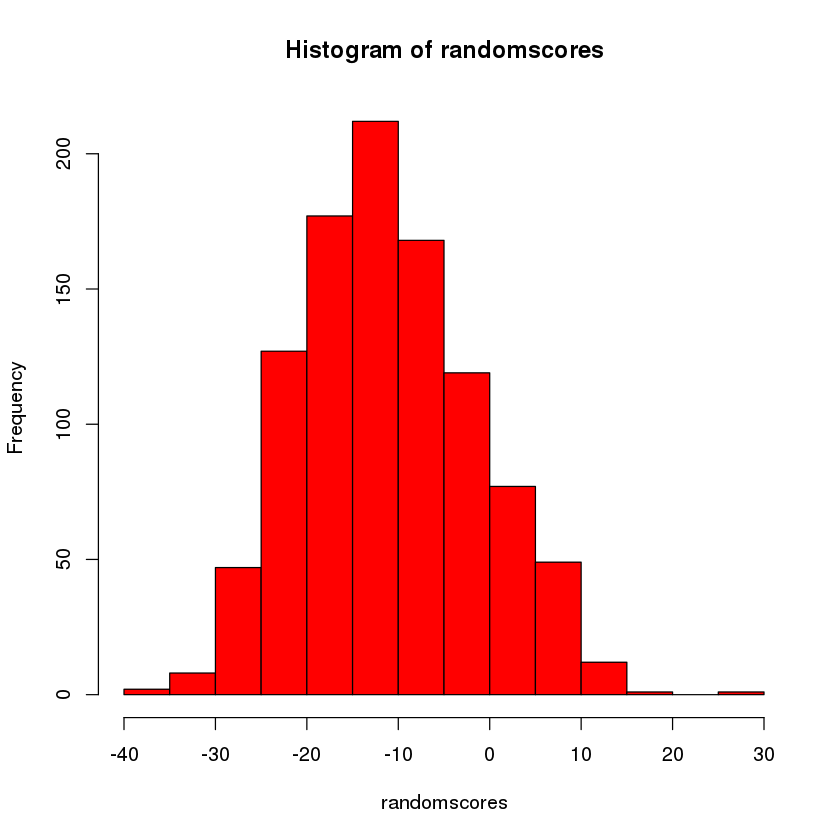

In [58]:
hist(randomscores, col="red") # Draw a red histogram

From the histogram, we can see that many alignments have higher scores than -5.

To calculate the actual p value, recall that we need to compute the probablility of obtaining alignment scores at least as good as -5.  This means scores greater than or equal to -5.

In [59]:
count_more_than_5 <- sum(randomscores >= -5)
count_more_than_5

[1] 293

We see that there are 293 alignments that satisfy this criteria (you might get a slightly different number).  Since we generated 1000 sequences, the p-value is 

In [4]:
count_more_than_5/1000

ERROR: Error in eval(expr, envir, enclos): object 'count_more_than_5' not found
